# Connect to drive

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [48]:
!pip install selenium
!pip install webdriver-manager
!apt-get update
!apt install chromium-chromedriver
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from google.colab import drive
from google.colab import files

import urllib.request
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
H

In [67]:
# mengambil gambar dari shope dengan silenium
images = []
keyword = 'masker wajah'

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)
# driver.get('https://shopee.co.id/search?keyword=babi')
driver.get('https://shopee.co.id/mall/search?keyword='+keyword)

#

time.sleep(5)
for i in range(10):
    driver.execute_script("window.scrollBy(0, 350)")
    time.sleep(1)

content = driver.page_source
soup = BeautifulSoup(content)

for item in soup.select('div[data-sqe="item"]'):
    # dataImg = item.img
    dataImg= item.find('img',class_="_7DTxhh vc8g9F")
  
    if dataImg is not None:
     
        images.append(dataImg['src'])

df = pd.DataFrame(
    { 'Images': images})







In [68]:
df.head()

,Images
0,https://cf.shopee.co.id/file/sg-11134201-23010...
1,https://cf.shopee.co.id/file/sg-11134201-22110...
2,https://cf.shopee.co.id/file/sg-11134201-22120...
3,https://cf.shopee.co.id/file/sg-11134201-22120...
4,https://cf.shopee.co.id/file/e1ad2d4b7c79382eb...


In [69]:
# mengubah dan dowload dataframe list menjadi file txt 
import string
import random

# Tentukan Panjang String
N = 7

res = ''.join(random.choices(string.ascii_uppercase +
							string.digits, k=N))

# print result
print("The generated random string : " + str(res))
nama_folder = str(res)
path = os.path.join('/content/gdrive/MyDrive/Dataset', nama_folder)
os.mkdir(path)

df.to_csv('/content/gdrive/MyDrive/Dataset/'+nama_folder+'/scraping11.txt', index=False,sep='\t')

with open(r"/content/gdrive/MyDrive/Dataset/"+nama_folder+"/scraping11.txt", 'r+') as fp:
    lines = fp.readlines()
    fp.seek(0)
    fp.truncate()
    fp.writelines(lines[1:])



The generated random string : C363SUF


In [70]:
# dowload gambar dari txt atau csv
with open("/content/gdrive/MyDrive/Dataset/"+nama_folder+"/scraping11.txt", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        filename = stripped_line[52:]
        urllib.request.urlretrieve(stripped_line, "/content/gdrive/MyDrive/Dataset/"+nama_folder+"/images" +filename)
        print(filename)

yzmi6lv42_tn
60ijfkv19_tn
9fw4qkvc5_tn
ay1z4kvf6_tn
95c708cdd_tn
3bbde16d8_tn
fbf86bea1_tn
cdf5c5884_tn
92baa3d9d_tn
30a2a6cac_tn
6ec9824c3_tn
bdef38f1e_tn
5064f5e52_tn
6fe6cab46_tn
avyeckvda_tn
phhrajv87_tn
611f0fc48_tn
84e08084b_tn
a97470ce7_tn
085a2923c_tn
ac447c196_tn
d894ae5ae_tn
h0abqjvd7_tn
lgynslv6b_tn
813b676aa_tn
a79cee3e8_tn
4dcd3540b_tn
7o9f2iv78_tn
a493b95b6_tn
cd94f12da_tn
830173b05_tn
b1b1274d2_tn
efd70db36_tn
ziyyulve0_tn
8e63gkv0a_tn
0j7sdlvfa_tn


In [71]:
# mengubah format gambar atau rename gambar
os.getcwd()
collection = "/content/gdrive/MyDrive/Dataset/"+nama_folder
for i, filename in enumerate(os.listdir(collection)):
  os.rename("/content/gdrive/MyDrive/Dataset/"+nama_folder+"/" + filename, "/content/gdrive/MyDrive/Dataset/"+nama_folder+"/" + str(i) + ".png")

os.remove("/content/gdrive/MyDrive/Dataset/"+nama_folder+"/0.png")

# Import YOLOv5

In [72]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5/yolov5
HEAD is now at fbe67e4 Fix `OMP_NUM_THREADS=1` for macOS (#8624)


# install dependencies

In [73]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output 
from utils.downloads import attempt_download  

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.13.0+cu116 CPU


**Improvisasi Opsi 1**



In [ ]:

img = []
img_file = []
os.chdir("/content/gdrive/MyDrive/Dataset/"+nama_folder)
os.getcwd()
path2 = '/content/gdrive/MyDrive/Dataset/'+nama_folder+'/'
def files(path):  
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file

for file in files("."):  
    img.append(path2+file)
    img_file.append(file)

print(img[0])

%cd /content/yolov5

model_name='best.pt'
model = torch.hub.load(os.getcwd(), 'custom', source='local', path = model_name, force_reload = True)
results = model(img)

# Results
results.pandas().xyxy[0]

detil = []
for i in range(len(img)):                                                              
    detil.append(results.xyxy[i].numpy())
    
print(detil)

INFO:yolov5:YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.8.16 torch-1.13.0+cu116 CPU

YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.8.16 torch-1.13.0+cu116 CPU



/content/gdrive/MyDrive/Dataset/C363SUF/1.png
/content/yolov5


INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:custom_YOLOv5s summary: 232 layers, 7251912 parameters, 0 gradients, 16.8 GFLOPs
custom_YOLOv5s summary: 232 layers, 7251912 parameters, 0 gradients, 16.8 GFLOPs
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


# Tampilkan gambar beserta klasifikasinya


asli



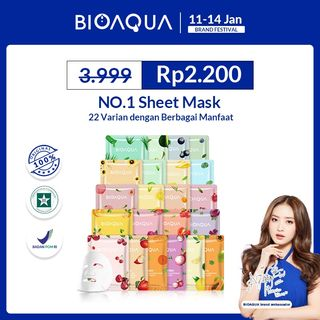


Repost



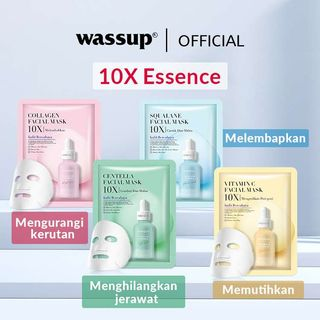


asli



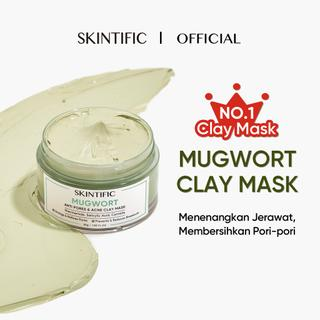


asli



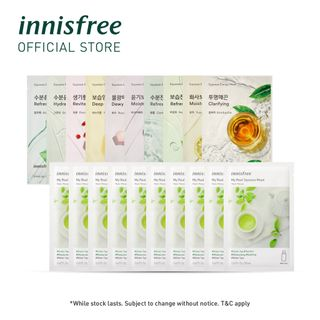


asli



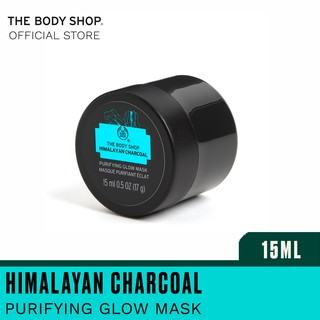


asli



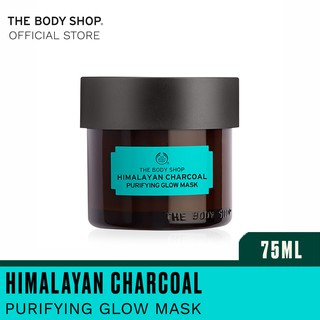


Repost



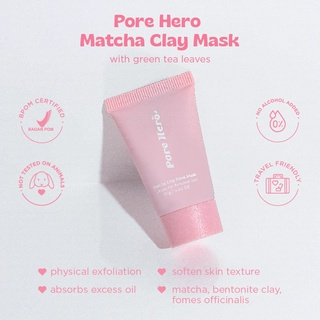


asli



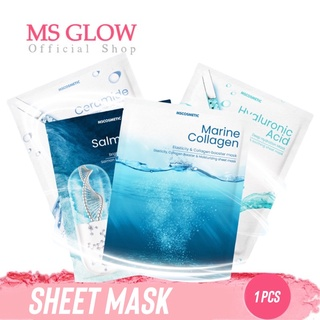


Repost



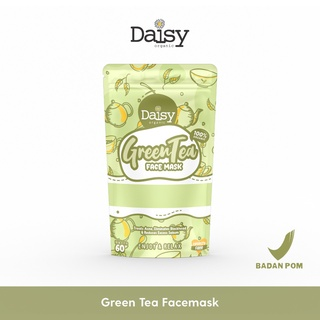


asli



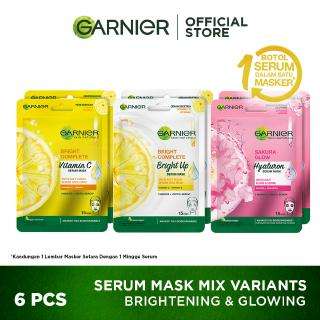


Repost



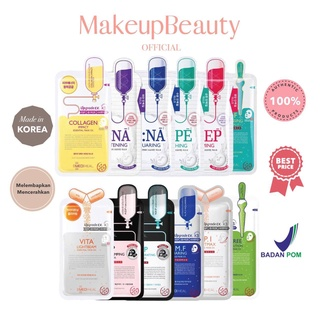


asli



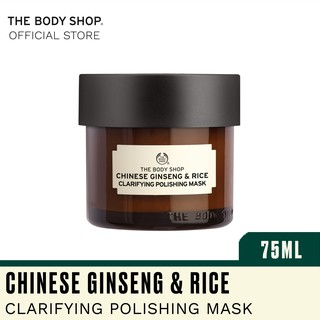


Repost



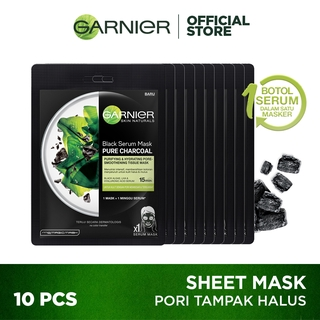


asli



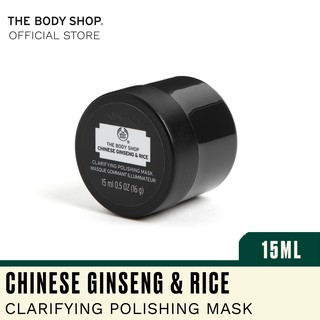


Repost



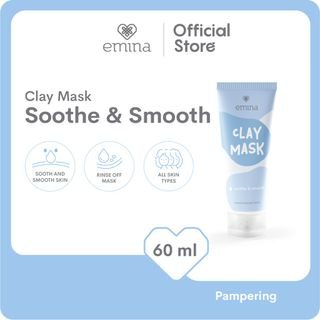


asli



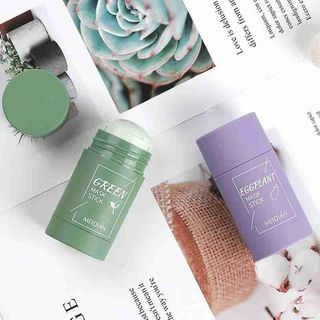


Repost



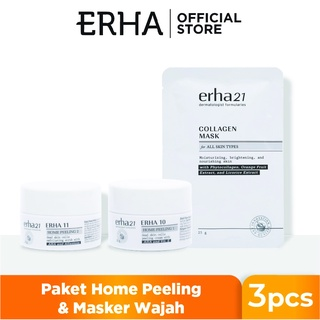


asli



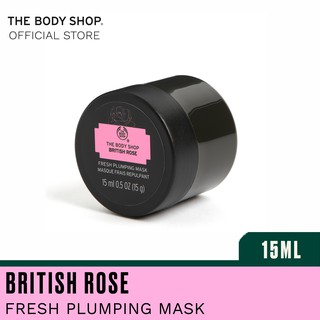


asli



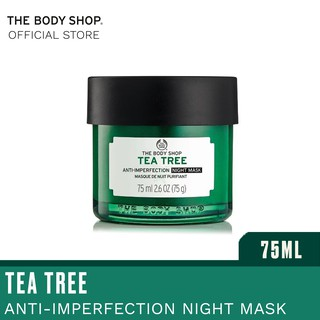


asli



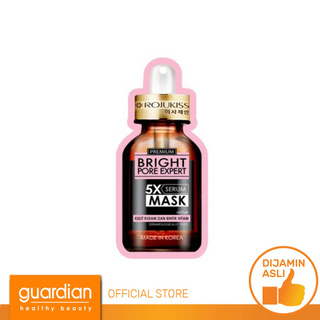


asli



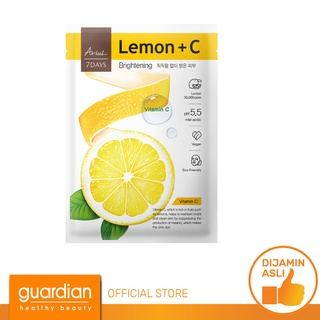


asli



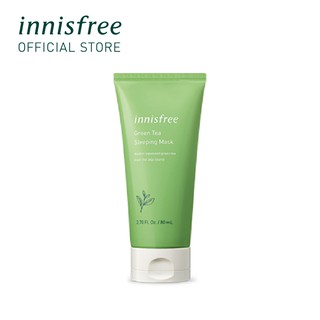


asli



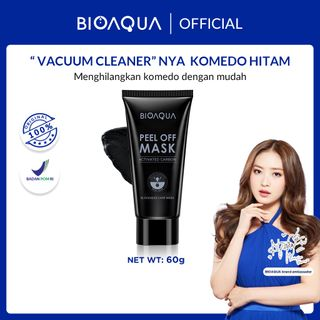


asli



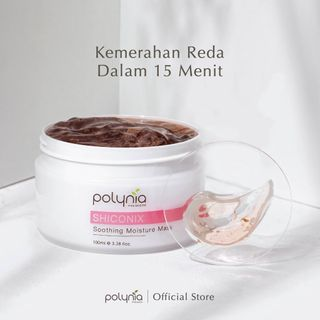


Repost



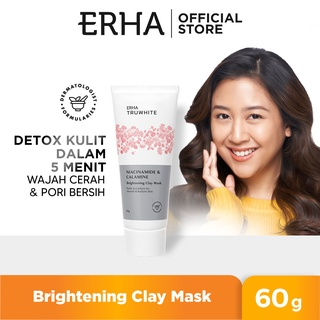


Repost



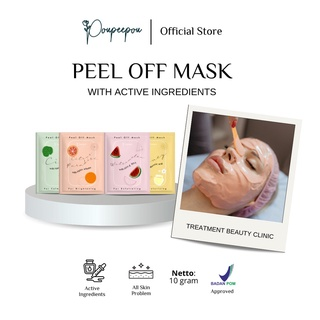


asli



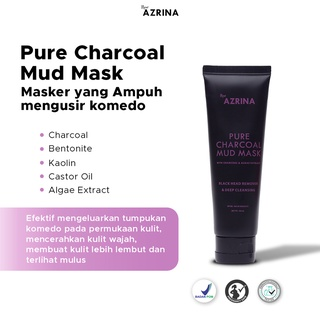


Repost



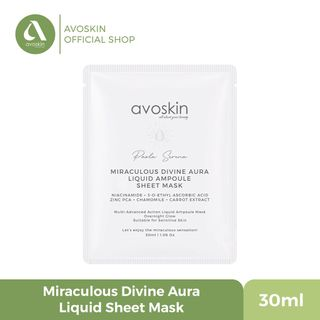


Repost



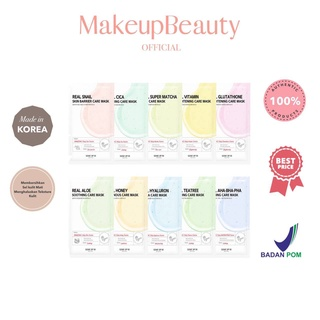


Repost



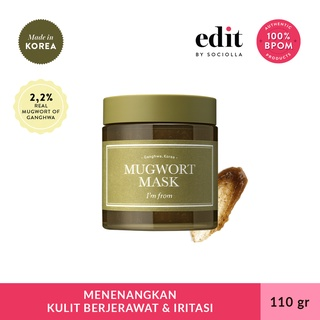


asli



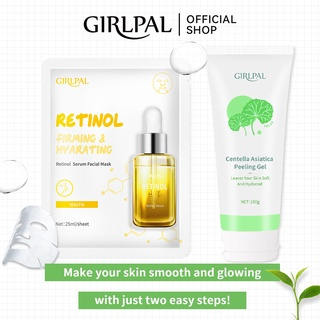


Repost



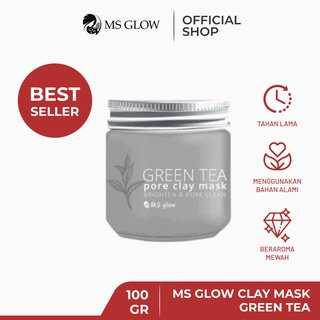


asli



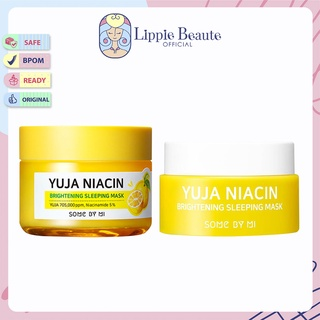


Repost



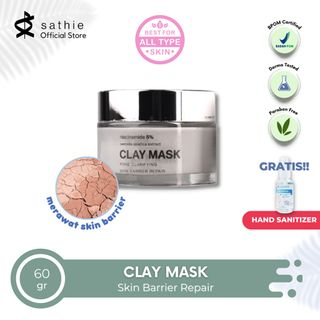


asli



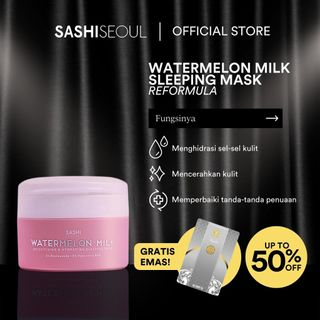


asli



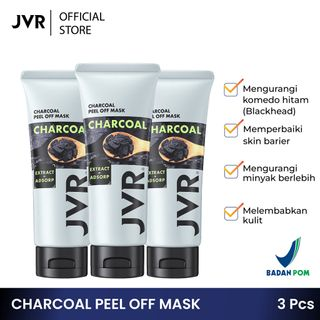

In [ ]:
import glob
from IPython.display import Image, display


for i in range(len(img)):
  print()
  if(len(detil[i]) > 1):
    print('Repost')
  else: 
    print('asli')
  print()
  display(Image(img[i]))


